#importing important libraries

In [4]:
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Load the data set

In [5]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data()

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
#lets take a look how image looks like
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

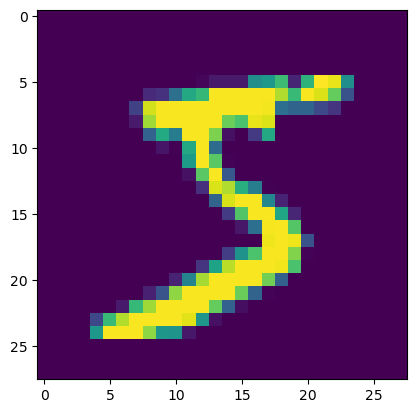

In [9]:
plt.imshow(X_train[0])

In [10]:
y_train[0]

5

#normalize the data

In [11]:
#the pizel value ranger from 0-255
#normalize the values using min max scaler
#formula is X-Xmin/Xmax-Xmin=X/255
X_train=X_train/255
X_test=X_test/255

In [12]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [13]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [14]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the input and output dimensions
input_dims = X_train.shape[1]
output_dims = 10

# Defining the sequential model
model = Sequential()

# Add the 1st dense layer to the sequential model
model.add(Dense(512, activation="sigmoid", input_shape=(input_dims,), name="Hidden_layer_1"))

# Add the 2nd dense layer to the sequential model
model.add(Dense(128, activation="sigmoid", name="Hidden_layer_2"))

# Add the output layer
model.add(Dense(output_dims, activation="softmax", name="output_layer"))


In [ ]:
#plotting the model
from tensorflow.keras.utils import plot_model
plot_model(model)

#Compile a neural network

In [ ]:
from tensorflow.keras.optimizers import RMSprop
#define the optimizer
optimizer=RMSprop(0.001)
#complile the model
model.compile(loss="binary_crossentropy",optimizer=optimizer,metrics=["accuracy"])

In [ ]:
#define the batch_size and no. of epochs
batch_size=128 #batch size should always be in 2^n where n=1,2,3,4....
num_epochs=20

#fit a neural network or train a neural_network
from keras.utils import to_categorical

# Assuming y_train is a 1D array of integer labels
y_train_one_hot = to_categorical(y_train, num_classes=output_dims)

# Now y_train_one_hot should have shape (batch_size, output_dims)

# Compile your model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train your model
history = model.fit(X_train, y_train_one_hot, validation_split=0.2, epochs=num_epochs, batch_size=batch_size, verbose=1)


In [ ]:
from keras.utils import to_categorical

# Assuming y_test is a 1D array of integer labels
y_test_one_hot = to_categorical(y_test, num_classes=output_dims)

# Now y_test_one_hot should have shape (batch_size, output_dims)

# Evaluate your model
score = model.evaluate(x=X_test, y=y_test_one_hot, verbose=0)
print("Test score:", score[0])
print("Test accuracy:", score[1])


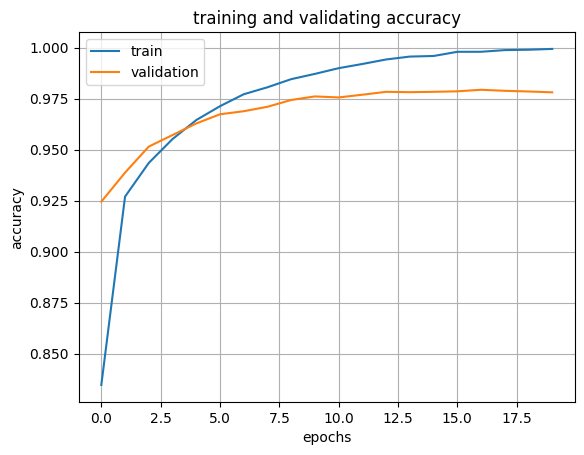

In [17]:
#plot training accuracy and validation accuracy
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("training and validating accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(["train","validation"])
plt.grid()
plt.show()

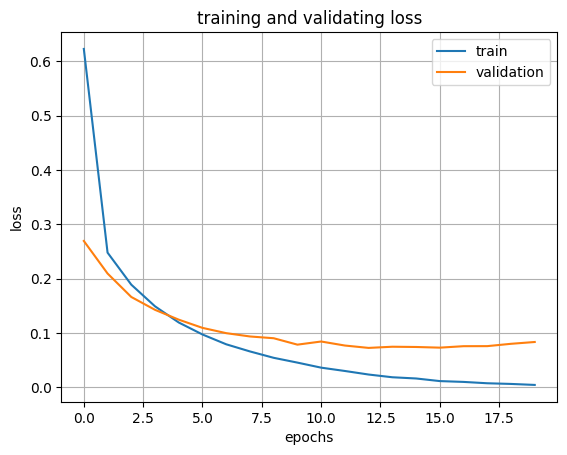

In [18]:
#plot training loss or validation loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("training and validating loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(["train","validation"])
plt.grid()
plt.show()

In [19]:
y_test[0]

7

In [20]:
y_pred=model.predict(X_test)
y_pred[:10]

313/313 [==============================] - 1s 3ms/step


array([[1.59012998e-08, 1.51377026e-06, 3.26705191e-07, 1.43671696e-05,
        2.31171882e-09, 8.20213064e-10, 4.36311360e-13, 9.99975502e-01,
        2.62854556e-08, 8.11731115e-06],
       [1.42370084e-07, 1.49073567e-05, 9.99984086e-01, 2.60329557e-07,
        2.79305995e-10, 1.96128846e-09, 7.58499326e-08, 7.27504812e-08,
        3.03126996e-07, 6.65789229e-11],
       [4.27992530e-09, 9.99975860e-01, 4.40043414e-06, 1.19804966e-08,
        4.41894002e-07, 7.03758971e-08, 3.63732943e-06, 1.45328431e-05,
        9.79165407e-07, 3.38076922e-09],
       [9.99876261e-01, 6.81321671e-06, 2.71060139e-06, 1.50724802e-07,
        4.68401453e-07, 3.70635576e-08, 1.64742232e-05, 1.52625344e-05,
        1.40259104e-07, 8.16225365e-05],
       [9.95045379e-10, 2.54059813e-07, 1.09910538e-07, 1.37737863e-10,
        9.99983370e-01, 2.90299729e-10, 1.27624666e-08, 1.43975685e-05,
        5.16048759e-09, 1.81080634e-06],
       [1.27584299e-09, 9.99959290e-01, 1.25692807e-07, 1.27447670e-08,
   

In [21]:
y_pred=np.array([np.argmax(pred)for pred in y_pred])
y_pred[0:10],y_test[0:10]

(array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9]),
 array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8))

In [22]:
# Import libraries for plotting Confusion Matrix and Classification Matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# This function plots the confusion matrices given y_i, Y_i_hat.
def plot_confusion_matrix(y_test, y_predict):
    cm = confusion_matrix(y_test, y_predict)
    labels = list(np.unique(y_test))

    # Color Map
    cmap = sns.light_palette("blue")

    # Plot Confusion Matrix
    plt.figure(figsize=(12, 12))
    sns.heatmap(cm, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title("Confusion matrix")
    plt.show()

    print()
    print('-' * 100)
    print("Classification Report: \n", classification_report(y_test, y_predict))
    print('Accuracy Score:', accuracy_score(y_test, y_predict) * 100)

# Example usage:
# Assuming you have y_test and y_predict
# plot_confusion_matrix(y_test, y_predict)


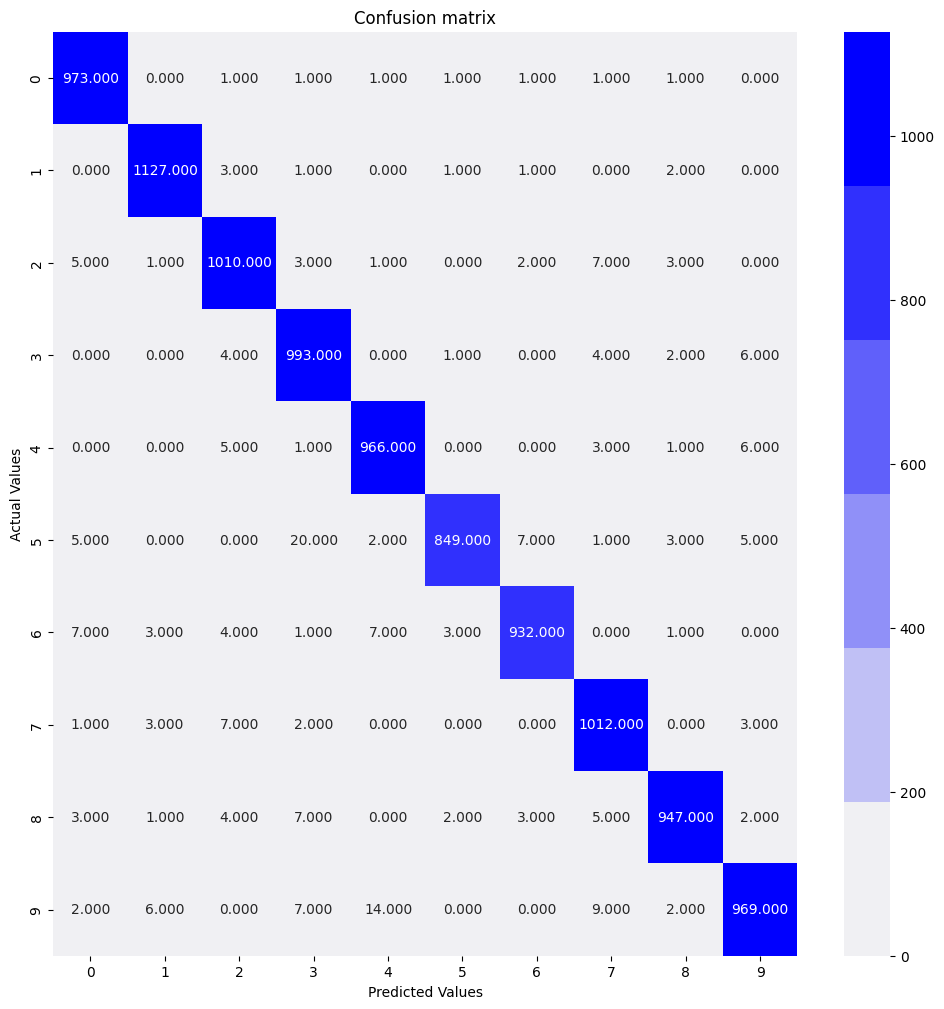


----------------------------------------------------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.96      0.98      0.97      1010
           4       0.97      0.98      0.98       982
           5       0.99      0.95      0.97       892
           6       0.99      0.97      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Accuracy Score: 97.78


In [23]:
plot_confusion_matrix(y_test, y_pred)
